<a href="https://colab.research.google.com/github/mrpratamaagung/prescreen_dsai/blob/master/Soal_Pretest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
descriptive analysis on `ingredients.csv`

In [1]:
!pip install pandas-profiling

https://intip.in/PreScreenAgung download the dataset

> Pemblokiran indentasi



In [0]:
# import libraries
import pandas as pd 
import pandas_profiling
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
%matplotlib inline 
sns.set(color_codes=True)

In [0]:
ingredients = pd.read_csv('ingredient.csv')

## Check Missing Values

In [6]:
ingredients.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

There are no missing values on `ingredients.csv`

## Check value data type of rows in each column

In [7]:
ingredients.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

All data are `float` type, we can assure that this dataset has numerical values and safe to calculate using pandas

## Descriptive analysis 
- count: 214
- standard deviation 
- mean
- max: E
- min: C,F,H, I
- quartiles

In [8]:
ingredients.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


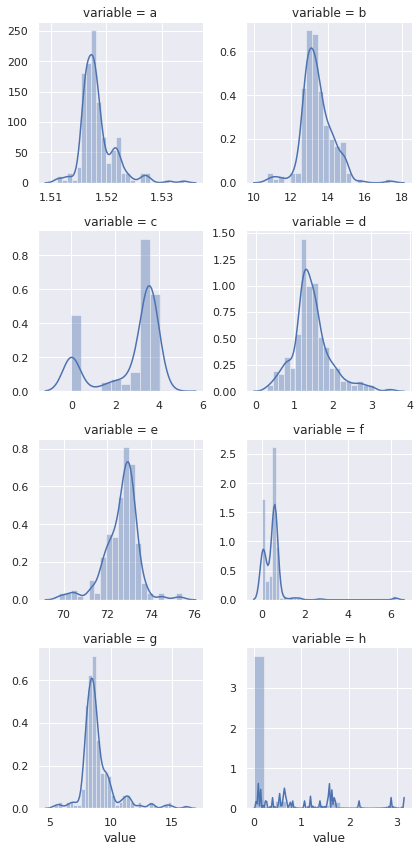

In [9]:
quant = ingredients.drop('i', axis=1)
f = pd.melt(ingredients, value_vars= quant)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

![](https://i.imgur.com/AqY1Xtf.jpg)
![](https://i.imgur.com/fJcYMzJ.jpg)
![](https://i.imgur.com/0Keodg5.jpg)
![](https://i.imgur.com/aAxQ3gx.jpg)
![](https://i.imgur.com/9HJfWJu.jpg)
![](https://i.imgur.com/C9LvC9N.jpg)
![](https://i.imgur.com/Y9ML2fC.jpg)
![](https://i.imgur.com/NnXo1zm.jpg)

## Detecting Outliers 
Using BoxPlot

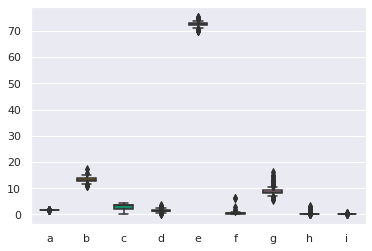

In [10]:
sns.boxplot(data=ingredients, palette='colorblind',width=.5)

Plotting in the boxplot, we cannot see the ouliers because scalling issue (e is too far away)

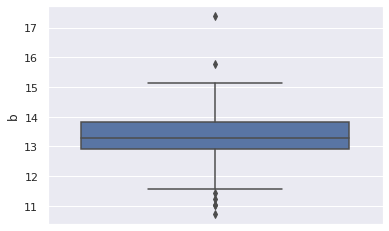

In [11]:
sns.boxplot(y=ingredients['b'])

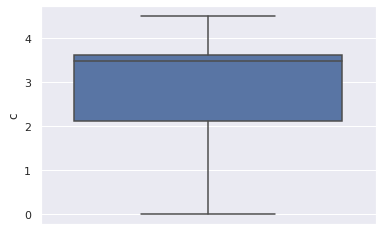

In [12]:
sns.boxplot(y=ingredients['c'])

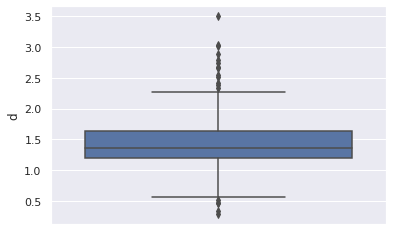

In [13]:
sns.boxplot(y=ingredients['d'])

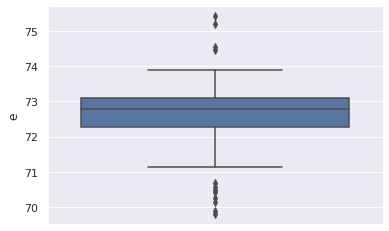

In [14]:
sns.boxplot(y=ingredients['e'])

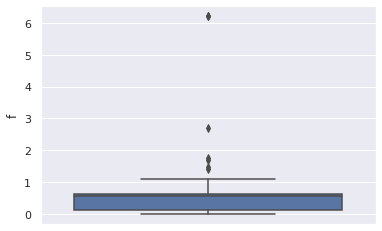

In [15]:
sns.boxplot(y=ingredients['f'])

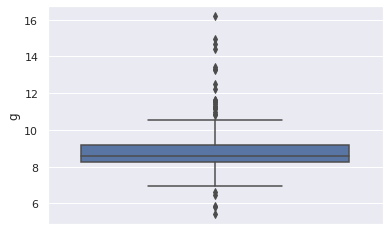

In [16]:
sns.boxplot(y=ingredients['g'])

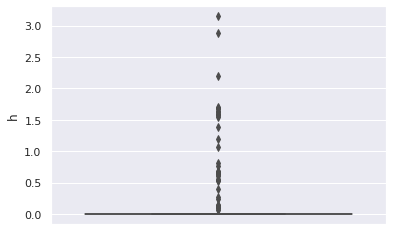

In [17]:
sns.boxplot(y=ingredients['h'])

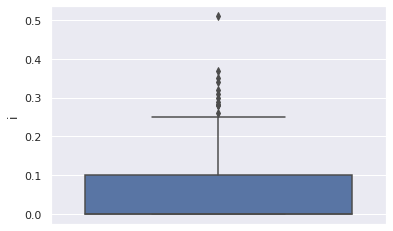

In [18]:
sns.boxplot(y=ingredients['i'])

## ANOVA test on a-d

In [19]:
from scipy.stats import stats

fp, pv = stats.f_oneway(ingredients['a'],ingredients['d'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 4.632505753163743
PR(>F): 0.03193283434904565


## KMeans Clustering

In [0]:
a = ingredients.values

In [21]:
a.shape

(214, 9)

Because there are 9 features, then we need to reduce it to 2 features, using several methods of dimensionality reduction 

In [0]:
from sklearn.decomposition  import TruncatedSVD

svd = TruncatedSVD(random_state=42).fit_transform(a)

In [0]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=42) 
pca=ICA.fit_transform(a)

In [0]:
import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=62).fit_transform(a)

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=30000, verbose=1,random_state=42 ).fit_transform(a)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 214 samples in 0.004s...
[t-SNE] Computed neighbors for 214 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 214 / 214
[t-SNE] Mean sigma: 0.437402
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.348938
[t-SNE] KL divergence after 1000 iterations: 0.303486


### Number of cluster

Testing the number of cluster using the Sum Of Squared Error, usually known as the elbow method, and silhouette score.

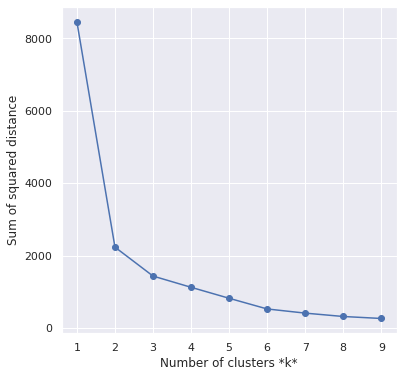

In [26]:
sse=[]
for k in range(1,10):
    k = KMeans(n_clusters=k, init='k-means++',n_init=10, max_iter=9999, tol=.0001,\
          verbose=0,random_state=42, copy_x=True, n_jobs=4, precompute_distances='auto' ,algorithm='auto')
    k.fit(umap_data)
    sse.append(k.inertia_)
plt.figure(figsize=(6, 6))
plt.plot(list(range(1,10)), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.show()

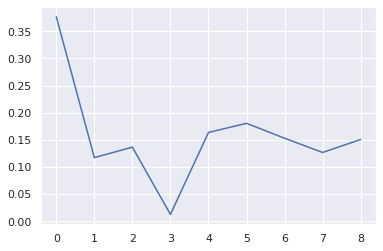

In [27]:
from sklearn.metrics import silhouette_score

s = []
for k in range(2,11): 
    k= KMeans(n_clusters=k, init='k-means++',n_init=10, max_iter=9999, tol=.0001,\
          verbose=0,random_state=42, copy_x=True, n_jobs=4, precompute_distances='auto' ,algorithm='auto')
    k.fit(umap_data)
    s.append(silhouette_score(a, k.labels_, metric='euclidean'))
plt.plot(s)

From Within cluster sum of squares, and silhouette score, we can see that 3 is the best number of cluster in kmeans. 

In [0]:
# applying kmeans
from sklearn.cluster import KMeans 
k = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=9999, tol=.0001,\
          verbose=0,random_state=42, copy_x=True, n_jobs=4, precompute_distances='auto' ,algorithm='auto')

In [0]:
k_ = k.fit_predict(umap_data)

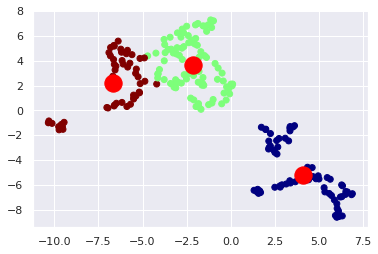

In [30]:
plt.scatter(umap_data[:,0],umap_data[:,1], c=k_, cmap='jet')
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], s=300, c='red')
plt.show()

From here we can see that umap, projects the data pretty good (separation is visible), so the k-means doesn't have to iterate too much.

# Question 2

In [0]:
import pandas as pd 

In [0]:
df = pd.read_csv('palm_ffb.csv')

## EDA

## Check Missing Values

In [33]:
missing = df.isnull().any()
missing

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [0]:
quant = df.drop('Date', axis=1)

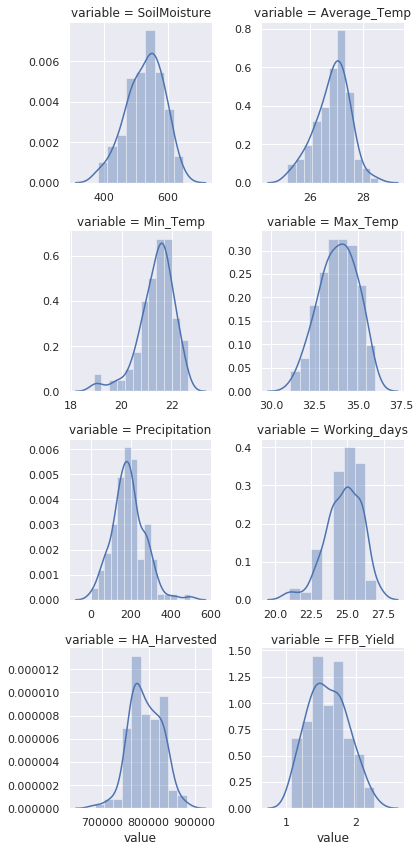

In [35]:
f = pd.melt(df, value_vars= quant)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Because the dataset has a continuous type of result, which shows in the 'FFB_Yield' so we can make a regression model by first searching the most important features that impacts the 'FFB_Yield'

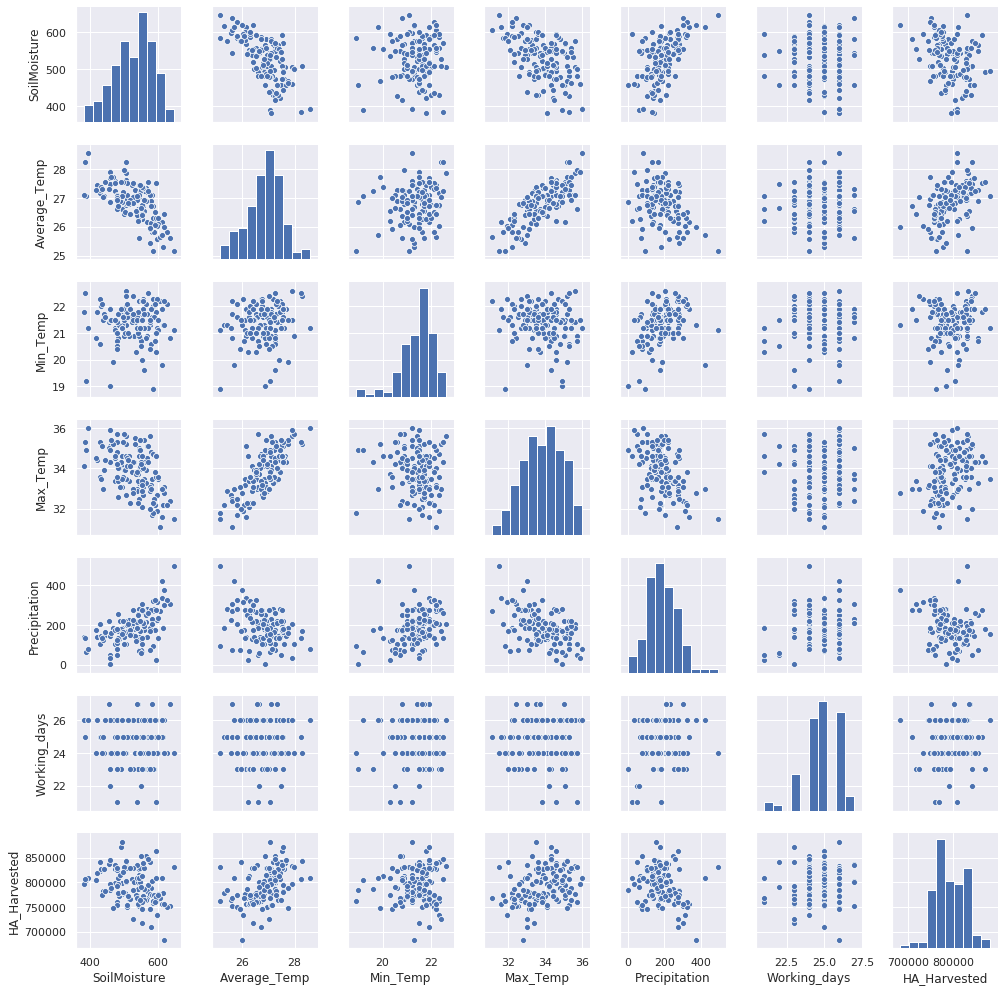

In [36]:
cols = ['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested']
sns.pairplot(df[cols], height=2)
plt.show()


Feature importance and feature selection 

[17:03:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


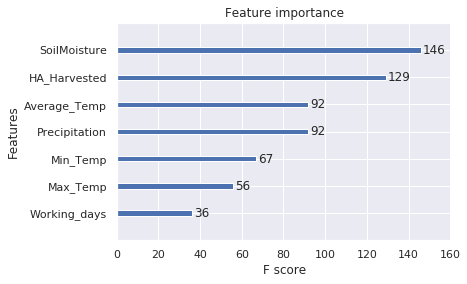

In [133]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

A = df.drop(['Date', 'FFB_Yield'], axis=1)
b = df['FFB_Yield']
model = XGBRegressor()
model.fit(A, b)
plot_importance(model)
pyplot.show()

In [0]:
X = df[['HA_Harvested','SoilMoisture']]
y = df['FFB_Yield']

In [0]:
# splitting train, and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [136]:
xgb = XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=0, nthread = -1)


xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[17:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [137]:
scores = cross_val_score(xgb, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[17:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: -0.21


In [138]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[17:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

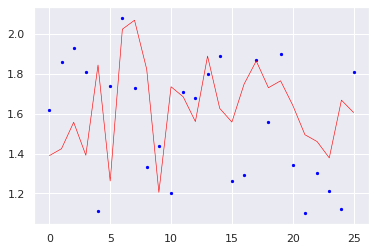

In [139]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color='blue', label='original')
plt.plot(x_ax, xgb_pred,lw=.6, color='red',label='predicted')

# Question 3

In [123]:
import string
from collections import Counter 


filename = 'abc.txt'    

def remove_punctuation(s): 
    s = s.lower()
    return ''.join(a for a in s if a not in string.punctuation)


text_clean = remove_punctuation(' '.join(open(filename).read().splitlines()))

def text_prob(kata_yang_dicari, asal_text):
    new_dict ={}
    for w in asal_text.split(): 
        if w  not in new_dict: 
            new_dict[w] = 1
        else: 
            new_dict[w]+=1
    total_text = sum(new_dict.values())

    return new_dict[kata_yang_dicari]/total_text

text_prob('data',text_clean)


0.05714285714285714

In [115]:
wc = Counter(text_clean.split()).most_common(5)
print(wc)

[('data', 18), ('to', 11), ('the', 11), ('a', 10), ('analytics', 10)]


<BarContainer object of 5 artists>

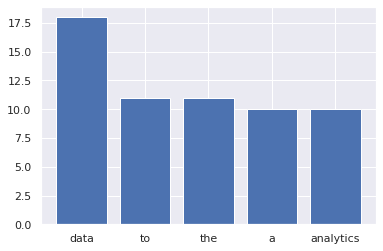

In [116]:
kata_plot = []
jumlah_plot = []
for elemen in wc: 
  kata_plot.append(elemen[0])
  jumlah_plot.append(elemen[1])
plt.bar(range(len(wc)), jumlah_plot, tick_label=kata_plot)

so we know that, 5 most common word. there are:\
'data' appears: 18 times\
'to' appears: 11 times\
'the' appears: 11 times\
'a' appears: 10 times\
'analytics' appears: 10 times

In [118]:
count=0
for text in text_clean.split('data analytics'): 
    count+=1
print(count)
count_=0
for text in text_clean.split('data'): 
    count_+=1
print(count_)
print(count/count_)

7
19
0.3684210526315789


In [131]:

def find_bigrams(s):
    input_list = s.split(" ")
    return zip(input_list, input_list[1:])

dual = find_bigrams(text_clean)
count = 0
for t in dual: 
  if ('data','analytics') == t:
    count+=1
count_=0
for t in text_clean.split(): 
  if 'data' == t: 
    count_+=1

print(f'word "data" comes after "analytics" is: {count/count_}')

word "data" comes after "analytics" is: 0.3333333333333333
